# Time Series

- https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

## Content
- Time series data structures
- Time-based indexing
- Visualizing time series data
- Seasonality
- Frequencies
- Resampling
- Rolling windows
- Trends

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

%matplotlib inline

!python -V
print(sys.executable)

Python 3.9.6
C:\Users\HAL9000\anaconda3\envs\data_science\python.exe


---
# Data Set

The dataset: Open Power Systems Data [Link](https://github.com/jenfly/opsd/raw/master/opsd_germany_daily.csv)

Daily time series of Open Power System Data (OPSD) for Germany, which has been rapidly expanding its renewable energy production in recent years. 
The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can download the data here.

Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh). The columns of the data file are:

- *Date* - Thedate(yyyy-mm-ddformat)
- *Consumption* - ElectricityconsumptioninGWh
- *Wind* - WindpowerproductioninGWh
- *Solar* - SolarpowerproductioninGWh
- *Wind+Solar* - SumofwindandsolarpowerproductioninGWh

---
# Creating a time series (data structure) DataFrame

**Todo:**
- check/adapt index
- check/adapt datetime
- add year/month/day columns for wrangling

In [21]:
# Open Power Systems Data
opsd_daily = pd.read_csv('opsd_germany_daily.csv')
opsd_daily.info  # not helpfull as it seems ?!

<bound method DataFrame.info of             Date  Consumption     Wind   Solar  Wind+Solar
0     2006-01-01   1069.18400      NaN     NaN         NaN
1     2006-01-02   1380.52100      NaN     NaN         NaN
2     2006-01-03   1442.53300      NaN     NaN         NaN
3     2006-01-04   1457.21700      NaN     NaN         NaN
4     2006-01-05   1477.13100      NaN     NaN         NaN
...          ...          ...      ...     ...         ...
4378  2017-12-27   1263.94091  394.507  16.530     411.037
4379  2017-12-28   1299.86398  506.424  14.162     520.586
4380  2017-12-29   1295.08753  584.277  29.854     614.131
4381  2017-12-30   1215.44897  721.247   7.467     728.714
4382  2017-12-31   1107.11488  721.176  19.980     741.156

[4383 rows x 5 columns]>

In [22]:
opsd_daily.shape

(4383, 5)

In [26]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [24]:
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

## Problem 1 - datetime
- Seems like Date is not recognized as DateTime Object!


In [25]:
opsd_daily['Date'] = pd.to_datetime(opsd_daily['Date'])
opsd_daily.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

## Problem 2 - index
- Wrong Index

In [27]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [28]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

## Solution while importing

In [29]:
df = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)

In [30]:
df.head()


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [31]:
df.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [32]:
df.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

## Add year/month/day

In [36]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['day'] = df.index.day
df.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,23
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,8
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,27
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,2
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,2


---
# Time-based indexing

**Remarks**:
-  `loc`
- also partial indexing


In [57]:
df.head()

# time-based indexing
df.loc['2015-01-01':'2015-01-03']

# partial string indexing
df.loc['2010-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day
Date,,,,,,,
2010-02-01,1536.453,151.409,NaN,NaN,2010,2,1
2010-02-02,1607.625,316.688,NaN,NaN,2010,2,2
2010-02-03,1585.581,225.569,NaN,NaN,2010,2,3
2010-02-04,1521.671,82.257,NaN,NaN,2010,2,4
2010-02-05,1509.085,141.031,NaN,NaN,2010,2,5
2010-02-06,1287.804,60.323,NaN,NaN,2010,2,6
2010-02-07,1183.454,21.540,NaN,NaN,2010,2,7
2010-02-08,1516.012,32.000,NaN,NaN,2010,2,8
2010-02-09,1556.840,24.739,NaN,NaN,2010,2,9


---
# Visualizing time series data

**Remarks**
- blub

In [92]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 7)})

<AxesSubplot:xlabel='Date'>

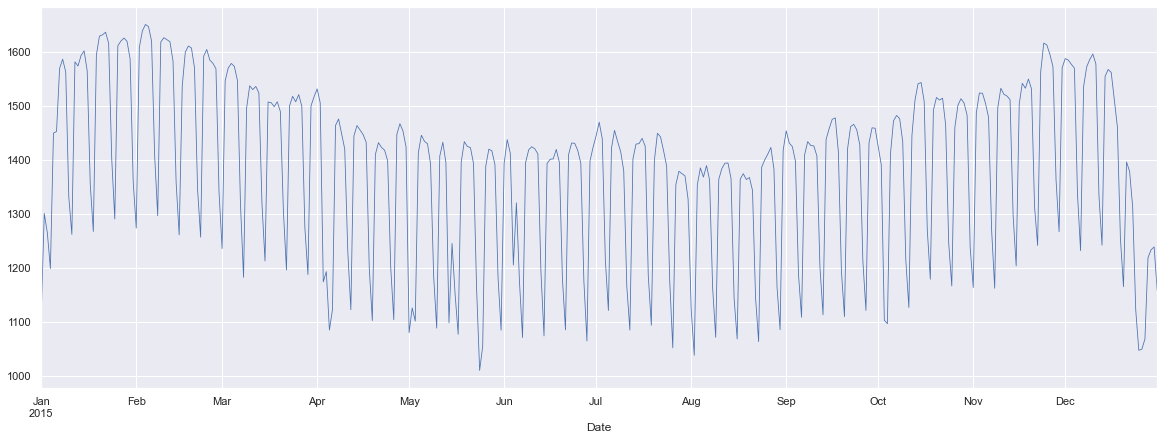

In [93]:
df['Consumption'].loc['2015'].plot(linewidth=0.8)

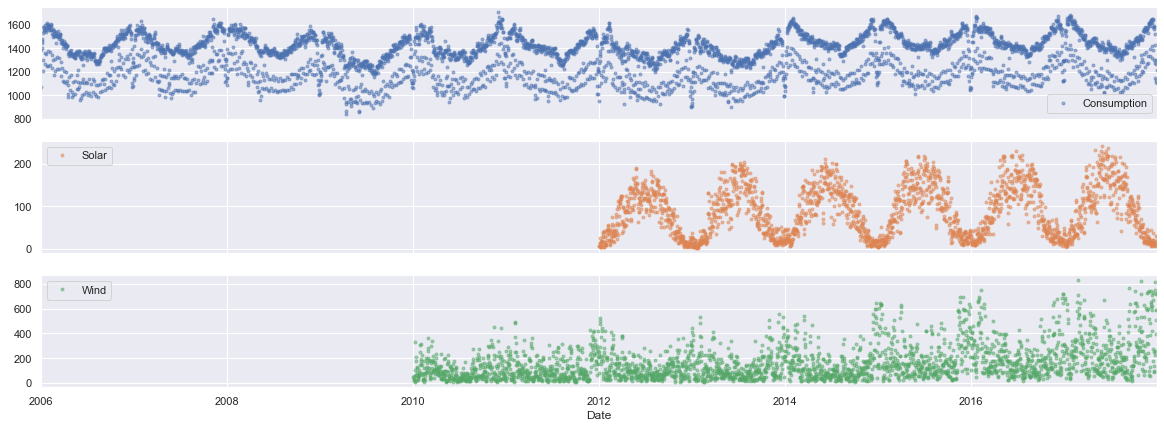

In [94]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', subplots=True)

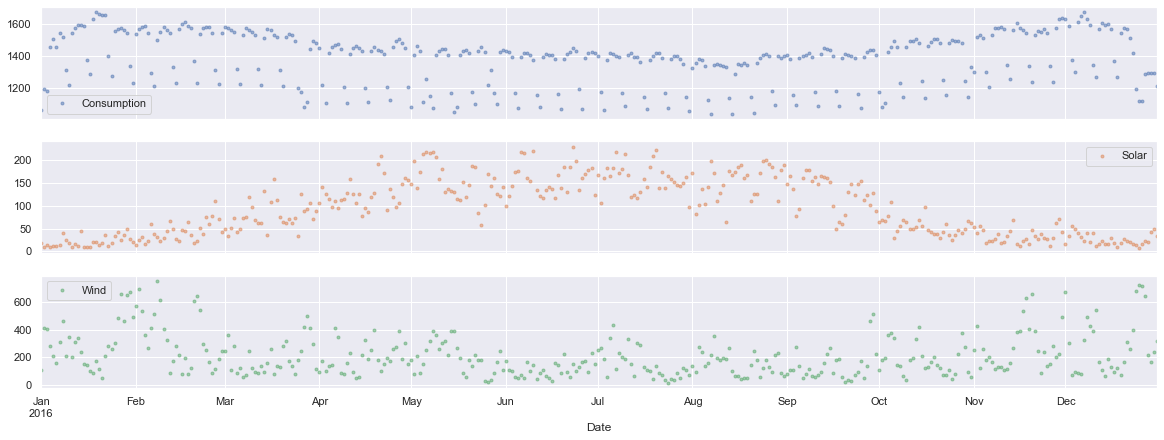

In [95]:
axes = df[cols_plot].loc['2016'].plot(marker='.', alpha=0.5, linestyle='None', subplots=True)